# Part 2 : 

## Part 2: Connecting to Foursquare and Yelp APIs

Your tasks are as follows:
1. Connect to the  [Foursquare](https://developer.foursquare.com/places) API
2. Connect to the [Yelp](https://www.yelp.com/developers/documentation/v3/get_started) API. This API offers similar services as Foursquare.
3. For each of the bike stations in Part 1, query both APIs to retrieve information for the following in that location:
 - Restaurants or bars
 - Various POIs (points of interest) of your choice
4. Create a DataFrame for the Yelp results and Foursquare results. 
5. Compare the quality of the Yelp and Foursquare API. For your location, which API gives you the most complete information/better coverage? *NOTE:* Your definition of 'coverage' is up to you. It could be simple 'number of POIs in the area', but it could also be something more specific like 'number of reviews per POI', or 'number of different attributes of each POI'.


Complete the **yelp_foursquare_EDA.ipynb** notebook to demonstrate how you executed the tasks above.

In [1]:
# imports
import requests
from IPython.display import JSON 
import pandas as pd
import os
import requests
import json
import matplotlib

## Foursquare

In [5]:
# import data from city_bikes - part 1
mtl_stations = pd.read_csv('../data/stations_data.csv')
# mtl_stations['latitude'][0]

mtl_stations


,station ids,latitude,longitude,free bikes,empty slots,total bikes
0,72bfd647b3d2b650546f42319729757d,45.617500,-73.606011,0,11,11
1,36c6491aa1b52e5ef7005f984738de27,45.516926,-73.564257,2,12,14
2,30f081e03c42b3e7b3a5c4cd5acc3286,45.541549,-73.565012,5,6,11
3,8db822a266b5ccb3a1e323ddc8721d62,45.506176,-73.711186,8,11,19
4,660275cd7d4368cc7590f1606c633bd6,45.512994,-73.682498,8,11,19
5,fddada5adc997290212b3f540c017274,45.514734,-73.691449,2,13,15
6,83d02cd8a043b8305a4031063005d32e,45.522341,-73.721679,6,9,15
7,888e6052f1aebab8d8a527776b3499b6,45.566869,-73.641017,6,9,15
8,3f191c8f95dbf309762b54dbb656522b,45.548136,-73.624340,4,9,13
9,f3e8bbaffc3930bc19681467b42595cf,45.447916,-73.583819,15,4,19


In [6]:
len(mtl_stations['station ids'])
mtl_stations.shape[0]

50

In [7]:
# extract data from Foursquare API

def get_bars(lat, long):
    url = "https://api.foursquare.com/v3/places/search"
    params = {
  	"query": "restaurant",
  	"ll": str(lat)+","+str(long),
  	"sort":"DISTANCE",
    "fields": 'name,rating,price,popularity,distance',
    "radius":"1000",
    "limit": 50}
    headers = {
    "Accept": "application/json",
    "Authorization": "fsq3abwKJ6iVdOjAznwWfKSu32hz7kDliaypJENWAblWw40="}
    response = requests.request("GET", url, params=params, headers=headers)
    # return name and address
    # print('get_bars function ran')
    return response.json()

In [8]:
output = []
for row in range(len(mtl_stations)):
    result = get_bars(mtl_stations['latitude'][row],mtl_stations['longitude'][row])
    # store results somewhere
    output.append(result)


In [9]:
# foursquare results for each city bike's station location
JSON(output)

<IPython.core.display.JSON object>

In [10]:
restaurant_count = []
for item in output:
    # print(len(item['results']))
    restaurant_count.append(len(item['results']))

print(restaurant_count)


[6, 50, 41, 9, 41, 42, 20, 10, 50, 6, 15, 4, 23, 34, 15, 27, 11, 48, 7, 49, 50, 50, 16, 13, 50, 6, 3, 19, 50, 13, 0, 28, 35, 30, 48, 21, 10, 4, 0, 19, 2, 50, 18, 13, 13, 43, 18, 50, 50, 13]


In [11]:
latitude_list = []
longitude_list = []
for row in range(len(mtl_stations)):
    latitude_list.append(mtl_stations['latitude'][row])
    longitude_list.append(mtl_stations['longitude'][row])

In [12]:
mtl_results = pd.DataFrame({'latitude': latitude_list,
                           'longitude': longitude_list,
                           'restaurant count': restaurant_count,
                           'num stalls': mtl_stations['total bikes']})
mtl_results

,latitude,longitude,restaurant count,num stalls
0,45.617500,-73.606011,6,11
1,45.516926,-73.564257,50,14
2,45.541549,-73.565012,41,11
3,45.506176,-73.711186,9,19
4,45.512994,-73.682498,41,19
5,45.514734,-73.691449,42,15
6,45.522341,-73.721679,20,15
7,45.566869,-73.641017,10,15
8,45.548136,-73.624340,50,13
9,45.447916,-73.583819,6,19


## Yelp

Send a request to Yelp with a small radius (1000m) for all the bike stations in your city of choice. 

In [13]:
def get_bars_yelp(lat, long):
    api_key = '7RCOn31VBzs-zHTKVq2nNFM9DeGzMtf4BqHC1768r8hN3PtZVhktVyuPqlxekvYR6rO7ko_zeB05kyJqqjR5ypILgmFaklqLCqvE6BnzqgfZus5a_wGJKLkoEbA-ZHYx'
    endpoint = 'https://api.yelp.com/v3/businesses/search'
    headers = {'Authorization': 'bearer %s' % api_key} 
    parameters = {'term': 'restaurant',
            'latitude': lat,
              'longitude': long,
              'radius': 1000}
    response = requests.get(url = endpoint, 
                        params = parameters,
                        headers = headers)
    return response.json()


In [15]:
# output of API call using hardcoded longitude and latitude values - to test that the function executres as expected
get_bars_yelp(45.617500,-73.606011)

{'businesses': [{'id': 'BpnevNTdiTqQpLD21cRg1A',
   'alias': 'grillades-sizzle-montréal',
   'name': 'Grillades Sizzle',
   'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/Pc-ERLWBNYwo48vOIUOPmQ/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/grillades-sizzle-montr%C3%A9al?adjust_creative=4Zavm-Q-lLCd4B0u0a5gMA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=4Zavm-Q-lLCd4B0u0a5gMA',
   'review_count': 3,
   'categories': [{'alias': 'portuguese', 'title': 'Portuguese'}],
   'rating': 3.5,
   'coordinates': {'latitude': 45.62398, 'longitude': -73.60103},
   'transactions': [],
   'price': '$$',
   'location': {'address1': '7300, boul Maurice-Duplessis',
    'address2': None,
    'address3': '',
    'city': 'Montreal',
    'zip_code': 'H1E 1M4',
    'country': 'CA',
    'state': 'QC',
    'display_address': ['7300, boul Maurice-Duplessis',
     'Montreal, QC H1E 1M4',
     'Canada']},
   'phone': '+15144949953',
   'display_phone': '+1 514-49

In [16]:
# output of API call using the list of longitude and latitude from stations list
output_yelp = []

for row in range(len(mtl_stations)):
    result_yelp = get_bars_yelp(mtl_stations['latitude'][row],mtl_stations['longitude'][row])
    # store results somewhere
    output_yelp.append(result_yelp)


In [17]:
# display JSON in a way that it easy to navigate and explore
JSON(output_yelp)

<IPython.core.display.JSON object>

Parse through the response to get the POI (such as restaurants, bars, etc) details you want (ratings, name, location, etc)

In [18]:
#get count of each restaurant within 1000m of each station. 
restaurant_count_yelp = []

for item in output_yelp:
    restaurant_count_yelp.append(item['total'])

print(restaurant_count_yelp)


[18, 602, 100, 29, 89, 89, 27, 31, 150, 31, 23, 8, 32, 58, 29, 50, 18, 82, 12, 84, 711, 360, 28, 27, 705, 14, 6, 17, 108, 20, 4, 33, 70, 41, 61, 40, 35, 16, 0, 29, 4, 452, 52, 22, 39, 141, 23, 200, 386, 36]


In [19]:
len(mtl_stations)

50

In [20]:
latitude_list = []
longitude_list = []
for row in range(len(mtl_stations)):
    latitude_list.append(mtl_stations['latitude'][row])
    longitude_list.append(mtl_stations['longitude'][row])

Put your parsed results into a DataFrame

In [21]:
mtl_results_yelp = pd.DataFrame({'latitude': latitude_list,
                           'longitude': longitude_list,
                           'restaurant count': restaurant_count_yelp,
                           'num stalls': mtl_stations['total bikes']})
mtl_results_yelp


,latitude,longitude,restaurant count,num stalls
0,45.617500,-73.606011,18,11
1,45.516926,-73.564257,602,14
2,45.541549,-73.565012,100,11
3,45.506176,-73.711186,29,19
4,45.512994,-73.682498,89,19
5,45.514734,-73.691449,89,15
6,45.522341,-73.721679,27,15
7,45.566869,-73.641017,31,15
8,45.548136,-73.624340,150,13
9,45.447916,-73.583819,31,19


In [22]:
#export to csv
mtl_results_yelp.to_csv('../data/mtl_results_yelp.csv', index=False)

## Comparing Results

Which API provided you with more complete data? Provide an explanation. 

**ANSWER:**
* Both Yelp and Foursquare provided the required data (restaurant count within 1K radius). 
* So considering the scope of the project, they both provided complete data.

Get the top 10 restaurants according to their rating

# trash

In [2]:
# imports
import requests
from IPython.display import JSON 
import pandas as pd
import os
import requests
import json
import matplotlib

## Foursquare

In [3]:
## part 2

In [18]:
# import data from city_bikes - part 1
mtl_stations = pd.read_csv('../data/stations_data.csv')
mtl_stations['latitude'][0]


# mtl_stations


45.617499783128075

In [11]:
len(mtl_stations['station ids'])
mtl_stations.shape[0]

50

In [12]:
# extract data from Foursquare API

def get_bars(lat, long):
    url = "https://api.foursquare.com/v3/places/search"
    params = {
  	"query": "restaurant",
  	"ll": str(lat)+","+str(long),
  	"sort":"DISTANCE",
    "fields": 'name,rating,price,popularity,distance',
    "radius":"1000",
    "limit": 50}
    headers = {
    "Accept": "application/json",
    "Authorization": "fsq3abwKJ6iVdOjAznwWfKSu32hz7kDliaypJENWAblWw40="}
    response = requests.request("GET", url, params=params, headers=headers)
    # return name and address
    # print('get_bars function ran')
    return response.json()

In [13]:
output = []
for row in range(len(mtl_stations)):
    result = get_bars(mtl_stations['latitude'][row],mtl_stations['longitude'][row])
    # store results somewhere
    output.append(result)


In [14]:
# foursquare results for each city bike's station location
JSON(output)

<IPython.core.display.JSON object>

In [16]:
restaurant_count = []
for item in output:
    # print(len(item['results']))
    restaurant_count.append(len(item['results']))

print(restaurant_count)

    
# need to investigate why max 10 results for each station. Outcome - found that there was a limit of 10 for results, updated result to 50 (maximum API allows)

[6, 50, 41, 9, 41, 42, 20, 10, 50, 6, 15, 4, 23, 34, 15, 27, 11, 48, 7, 49, 50, 50, 16, 13, 50, 6, 3, 19, 50, 13, 0, 28, 35, 30, 48, 21, 10, 4, 0, 19, 2, 50, 18, 13, 13, 43, 18, 50, 50, 13]


In [19]:
latitude_list = []
longitude_list = []
for row in range(len(mtl_stations)):
    latitude_list.append(mtl_stations['latitude'][row])
    longitude_list.append(mtl_stations['longitude'][row])

In [22]:
mtl_results = pd.DataFrame({'latitude': latitude_list,
                           'longitude': longitude_list,
                           'restaurant count': restaurant_count,
                           'num stalls': mtl_stations['total bikes']})
mtl_results

,latitude,longitude,restaurant count,num stalls
0,45.617500,-73.606011,6,11
1,45.516926,-73.564257,50,13
2,45.541549,-73.565012,41,11
3,45.506176,-73.711186,9,19
4,45.512994,-73.682498,41,19
5,45.514734,-73.691449,42,15
6,45.522341,-73.721679,20,15
7,45.566869,-73.641017,10,15
8,45.548136,-73.624340,50,14
9,45.447916,-73.583819,6,19


## Yelp

Send a request to Yelp with a small radius (1000m) for all the bike stations in your city of choice. 

In [39]:
def get_bars_yelp(lat, long):
    api_key = '7RCOn31VBzs-zHTKVq2nNFM9DeGzMtf4BqHC1768r8hN3PtZVhktVyuPqlxekvYR6rO7ko_zeB05kyJqqjR5ypILgmFaklqLCqvE6BnzqgfZus5a_wGJKLkoEbA-ZHYx'
    endpoint = 'https://api.yelp.com/v3/businesses/search'
    headers = {'Authorization': 'bearer %s' % api_key} 
    parameters = {'term': 'restaurant',
            'latitude': lat,
              'longitude': long,
              'radius': 1000}
    response = requests.get(url = endpoint, 
                        params = parameters,
                        headers = headers)
    return response.json()


In [40]:
get_bars_yelp(45.617500,-73.606011)

{'businesses': [{'id': 'BpnevNTdiTqQpLD21cRg1A',
   'alias': 'grillades-sizzle-montréal',
   'name': 'Grillades Sizzle',
   'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/Pc-ERLWBNYwo48vOIUOPmQ/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/grillades-sizzle-montr%C3%A9al?adjust_creative=4Zavm-Q-lLCd4B0u0a5gMA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=4Zavm-Q-lLCd4B0u0a5gMA',
   'review_count': 3,
   'categories': [{'alias': 'portuguese', 'title': 'Portuguese'}],
   'rating': 3.5,
   'coordinates': {'latitude': 45.62398, 'longitude': -73.60103},
   'transactions': [],
   'price': '$$',
   'location': {'address1': '7300, boul Maurice-Duplessis',
    'address2': None,
    'address3': '',
    'city': 'Montreal',
    'zip_code': 'H1E 1M4',
    'country': 'CA',
    'state': 'QC',
    'display_address': ['7300, boul Maurice-Duplessis',
     'Montreal, QC H1E 1M4',
     'Canada']},
   'phone': '+15144949953',
   'display_phone': '+1 514-49

In [41]:
output_yelp = []

for row in range(len(mtl_stations)):
    result_yelp = get_bars_yelp(mtl_stations['latitude'][row],mtl_stations['longitude'][row])
    # store results somewhere
    output_yelp.append(result_yelp)


In [43]:
JSON(output_yelp)

<IPython.core.display.JSON object>

In [52]:
restaurant_count_yelp = []

for item in output_yelp:
    restaurant_count_yelp.append(item['total'])

print(restaurant_count_yelp)


[18, 602, 100, 29, 89, 89, 27, 31]


In [ ]:
latitude_list = []
longitude_list = []
for row in range(len(mtl_stations)):
    latitude_list.append(mtl_stations['latitude'][row])
    longitude_list.append(mtl_stations['longitude'][row])

In [56]:
mtl_results_yelp = pd.DataFrame({'latitude': latitude_list,
                           'longitude': longitude_list,
                           'restaurant count': restaurant_count_yelp,
                           'num stalls': mtl_stations['total bikes']})
mtl_results_yelp

,latitude,longitude,restaurant count,num stalls
0,45.617500,-73.606011,18,11
1,45.516926,-73.564257,602,13
2,45.541549,-73.565012,100,12
3,45.506176,-73.711186,29,19
4,45.512994,-73.682498,89,21
5,45.514734,-73.691449,89,15
6,45.522341,-73.721679,27,15
7,45.566869,-73.641017,31,14


In [57]:
mtl_results_yelp.to_csv('../data/mtl_results_yelp.csv', index=False)

In [8]:
api_key = '7RCOn31VBzs-zHTKVq2nNFM9DeGzMtf4BqHC1768r8hN3PtZVhktVyuPqlxekvYR6rO7ko_zeB05kyJqqjR5ypILgmFaklqLCqvE6BnzqgfZus5a_wGJKLkoEbA-ZHYx'
endpoint = 'https://api.yelp.com/v3/businesses/search'
headers = {'Authorization': 'bearer %s' % api_key} # ???????

parameters = {'term': 'restaurant',
            'latitude': mtl_stations['latitude'][0],
              'longitude': mtl_stations['longitude'][0],
              'radius': 1000}

response = requests.get(url = endpoint, 
                        params = parameters,
                        headers = headers)

business_data = response.json()
JSON(business_data)
            


<IPython.core.display.JSON object>

Parse through the response to get the POI (such as restaurants, bars, etc) details you want (ratings, name, location, etc)

In [37]:
# get count of restaurants within 1000m of each station 

yelp_restaurant_name = []
for index in range(len(business_data['businesses']):
                   
    

SyntaxError: unexpected EOF while parsing (4085597234.py, line 2)

Put your parsed results into a DataFrame

## Comparing Results

Which API provided you with more complete data? Provide an explanation. 

Get the top 10 restaurants according to their rating

## archive - ignore

In [13]:
# np array - other option 
latitude_list_2 = mtl_stations['latitude'].values
latitude_list_2

array([45.61749978, 45.51692621, 45.5415485 , 45.50617584, 45.51299386,
       45.51473429, 45.5223415 , 45.56686935])

## joining Data blocks (to be removed)

In [12]:
latitude_list = []
for row in range(len(mtl_stations)):
    latitude_list.append(mtl_stations['latitude'][row])

,latitude,longitude,restaurant count,num stalls
0,45.617500,-73.606011,6,11
1,45.516926,-73.564257,50,13
2,45.541549,-73.565012,41,12
3,45.506176,-73.711186,9,19
4,45.512994,-73.682498,41,21
5,45.514734,-73.691449,42,15
6,45.522341,-73.721679,20,15
7,45.566869,-73.641017,10,14


In [20]:
mtl_stations[['latitude','longitude','total bikes']]

,latitude,longitude,total bikes
0,45.617500,-73.606011,11
1,45.516926,-73.564257,13
2,45.541549,-73.565012,12
3,45.506176,-73.711186,19
4,45.512994,-73.682498,21
5,45.514734,-73.691449,15
6,45.522341,-73.721679,15
7,45.566869,-73.641017,14


<Axes: xlabel='num stalls', ylabel='restaurant count'>

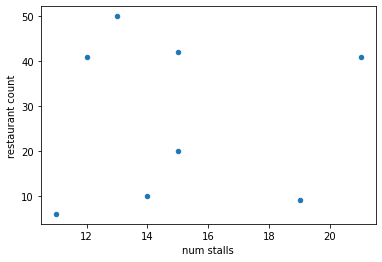

In [21]:
# EDA visulalize the data
mtl_results.plot.scatter(x ='num stalls', y ='restaurant count')

<Axes: xlabel='restaurant count', ylabel='num stalls'>

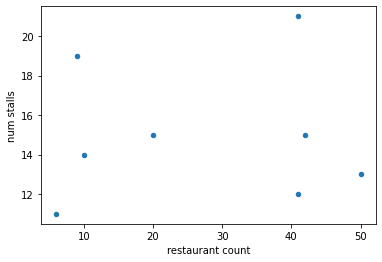

In [22]:
mtl_results.plot.scatter(x ='restaurant count', y ='num stalls')

## code from part 1 

In [3]:
# get network data
city_bike_networks = requests.get("http://api.citybik.es/v2/networks").json()

# view json in nice format
JSON(city_bike_networks)

<IPython.core.display.JSON object>

In [4]:
#get data for certain network_id
network_id = 'bixi-montreal'
network_json = requests.get("http://api.citybik.es/v2/networks/"+network_id).json()
JSON(network_json)

<IPython.core.display.JSON object>

In [5]:
# get all locations into a data frame
def locations(data):
    country_list= []
    city_list = []
    lat_list = []
    long_list = []
    id_list = []
    for index in range(len(city_bike_networks['networks'])):
        net_id = city_bike_networks['networks'][index]['id']
        country = city_bike_networks['networks'][index]['location']['country']
        city = city_bike_networks['networks'][index]['location']['city']
        latitude = city_bike_networks['networks'][index]['location']['latitude'] 
        longitude = city_bike_networks['networks'][index]['location']['longitude']
        id_list.append(net_id)
        country_list.append(country)
        city_list.append(city)
        lat_list.append(latitude)
        long_list.append(longitude)
    all_locations = pd.DataFrame({'Country':country_list,'City':city_list, 'Latitude': lat_list, 'Longitude': long_list, 'id': id_list})
    return all_locations

all_locs = locations(city_bike_networks)

In [6]:
mtl_stations = pd.DataFrame()
data = network_json['network']
station_id_list = []
lat_list = []
long_list = []
free_list = []
empty_list = []
total_list = []
for index in range(len(data)):
    station_id = network_json['network']['stations'][index]['id']
    station_id_list.append(station_id)
    lat = network_json['network']['stations'][index]['latitude']
    lat_list.append(lat)
    long = network_json['network']['stations'][index]['longitude']
    long_list.append(long)
    free_bikes = network_json['network']['stations'][index]['free_bikes']
    free_list.append(free_bikes)
    empty_slots = network_json['network']['stations'][index]['empty_slots']
    empty_list.append(empty_slots)
    total = free_bikes+empty_slots
    total_list.append(total)

    mtl_stations = pd.DataFrame({'station ids':station_id_list,'latitude': lat_list, 
                             'longitude': long_list, 'free bikes': free_list, 'empty slots':empty_list, 'total bikes': total_list})
mtl_stations

,station ids,latitude,longitude,free bikes,empty slots,total bikes
0,72bfd647b3d2b650546f42319729757d,45.617500,-73.606011,3,8,11
1,36c6491aa1b52e5ef7005f984738de27,45.516926,-73.564257,8,7,15
2,30f081e03c42b3e7b3a5c4cd5acc3286,45.541549,-73.565012,0,11,11
3,8db822a266b5ccb3a1e323ddc8721d62,45.506176,-73.711186,9,10,19
4,660275cd7d4368cc7590f1606c633bd6,45.512994,-73.682498,1,17,18
5,fddada5adc997290212b3f540c017274,45.514734,-73.691449,5,10,15
6,83d02cd8a043b8305a4031063005d32e,45.522341,-73.721679,7,8,15
7,888e6052f1aebab8d8a527776b3499b6,45.566869,-73.641017,7,8,15


Send a request to Foursquare with a small radius (1000m) for all the bike stations in your city of choice. 

In [7]:
# foursquare results for everything within 1000 m of each station location

mtl_stations[['station ids','latitude','longitude']]
# print(type(mtl_stations))


,station ids,latitude,longitude
0,72bfd647b3d2b650546f42319729757d,45.617500,-73.606011
1,36c6491aa1b52e5ef7005f984738de27,45.516926,-73.564257
2,30f081e03c42b3e7b3a5c4cd5acc3286,45.541549,-73.565012
3,8db822a266b5ccb3a1e323ddc8721d62,45.506176,-73.711186
4,660275cd7d4368cc7590f1606c633bd6,45.512994,-73.682498
5,fddada5adc997290212b3f540c017274,45.514734,-73.691449
6,83d02cd8a043b8305a4031063005d32e,45.522341,-73.721679
7,888e6052f1aebab8d8a527776b3499b6,45.566869,-73.641017


In [8]:
# get lat long as strings 
def get_venues(mtl_stations):
    lat, long = mtl_stations['latitude'].astype('str'), mtl_stations['longitude'].astype('str')
    return lat, long
get_venues(mtl_stations)


(0    45.617499783128075
 1    45.516926210319546
 2     45.54154850456526
 3    45.506175841460966
 4      45.5129938566323
 5     45.51473429416659
 6     45.52234149817879
 7    45.566869345371856
 Name: latitude, dtype: object,
 0    -73.60601127147675
 1    -73.56425732374191
 2    -73.56501236557959
 3    -73.71118605136871
 4    -73.68249848484993
 5    -73.69144901633263
 6    -73.72167885303497
 7    -73.64101678133011
 Name: longitude, dtype: object)

In [9]:
for location in mtl_stations:
    get_bars(lat, long) 

NameError: name 'get_bars' is not defined

#### Model Building Blocks

In [23]:
import statsmodels.api as sm

In [24]:
X = mtl_results['restaurant count']
y = pd.Series(mtl_results['num stalls'])

In [25]:
y

0    11
1    13
2    12
3    19
4    21
5    15
6    15
7    14
Name: num stalls, dtype: int64

In [26]:
# make a regresssion to predict the num of restaurants based on the num of stalls available 
x = sm.add_constant(X) # adding a constant
lin_reg = sm.OLS(y,x)
print('x type:', type(x))

x type: <class 'pandas.core.frame.DataFrame'>


In [27]:
model = lin_reg.fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             num stalls   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.163
Method:                 Least Squares   F-statistic:                   0.02041
Date:                Wed, 19 Apr 2023   Prob (F-statistic):              0.891
Time:                        09:30:21   Log-Likelihood:                -20.647
No. Observations:                   8   AIC:                             45.29
Df Residuals:                       6   BIC:                             45.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               14.6955      2.499  

/opt/homebrew/Caskroom/miniforge/base/envs/lhl_env/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### Analysis:

* very high p-value of 0.891 indicates there is not a statistically significant relationship between the the number of restaurants to effectively predict the # of stalls available
* very small r-square value of 0.003 indicates that this model explains less than 0.3% of the patterns in the data. 
* conclusion: not a strong model. Need to either look at other variables, or increase the # of stations. Even with the maximum results from foursquare. 

### Extra - non mvp 

In [19]:
restaurant_name_list = []
for index, row in mtl_stations.iterrows():
    r1 = get_bars(row['latitude'], row['longitude'])
    latitude = row['latitude']
    longitude = row['longitude']
    for item in r1['results']:
        restaurant_name = item['name']
        restaurant_name_list.append(restaurant_name)
    # print(restaurant_name_list)
# TO DO - bring in lat and long data and sation id info into output
    # 
    # restaurant_name = r1['results']['name']
    

# distance_list

# popularity_list 


In [11]:
restaurant_names = []
for index in range(len(result['results'])):
    restaurant_names.append(result['results'][index]['name'])
print(restaurant_names)


['Allô Mon Coco', 'Restaurant Prima Luna', 'Pizzeria Etc']


In [13]:
distances_list = []
for index in range(len(result['results'])):
    distances_list.append(result['results'][index]['distance'])
print(distances_list)

[841, 910, 931]


In [15]:
popularity_list = []
for index in range(len(result['results'])):
    popularity_list.append(result['results'][index]['popularity'])
print(popularity_list)

[0.8117385178256391, 0.9710385166416046, 0.8565423825141788]


In [23]:
rating_list = []
for index in range(len(result['results'])):
    try:
        rating_list.append(result['results'][index]['rating'])
    except:
        rating_list.append('None')
print(rating_list)

['None', 7.4, 'None']


Parse through the response to get the POI (such as restaurants, bars, etc) details you want (ratings, name, location, etc)

In [20]:
latitude

45.566869345371856

Put your parsed results into a DataFrame

In [22]:
#
restaurants = pd.DataFrame({'station id': ******, 'station latitude': latitude*len(****), 'station longitude': longitude*len(***), 'Restaurant name': restaurant_names,'distance': distances_list, 'Rating': rating_list, 'Popularity': popularity_list})

restaurants

,Restaurant name,distance,Rating,Popularity
0,Allô Mon Coco,841,NaN,0.811739
1,Restaurant Prima Luna,910,7.4,0.971039
2,Pizzeria Etc,931,NaN,0.856542
